<a href="https://colab.research.google.com/github/flexinJ/projectsPython/blob/main/Hackaton_Bolsa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 1**

In [ ]:
# Importando blibliotecas necessárias
from zipfile import ZipFile as uzp
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [ ]:
# Extraindo o csv .zip
with uzp('/content/drive/MyDrive/Classroom/Hacatom IA Hacatom/Jonas Morais - csv.zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Dataset')

In [ ]:
# Concatenando todos os .cvs em um único dataframe
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join("/content/drive/MyDrive/Dataset/csv", "dados*.csv"))), ignore_index=True)

In [ ]:
# Vizualiando as colunas do conjuto de dados para localizar a variavel tempo e organizando-as em uma lista
columnsSort = df.columns.to_list()
columnsSort.sort()
columnsSort

['CD_ESTACAO',
 'CHUVA',
 'DC_NOME',
 'DT_MEDICAO',
 'HR_MEDICAO',
 'PRE_INS',
 'PRE_MAX',
 'PRE_MIN',
 'PTO_INS',
 'PTO_MAX',
 'PTO_MIN',
 'RAD_GLO',
 'St',
 'TEM_INS',
 'TEM_MAX',
 'TEM_MIN',
 'TEM_SEN',
 'UF',
 'UMD_INS',
 'UMD_MAX',
 'UMD_MIN',
 'VEN_DIR',
 'VEN_RAJ',
 'VEN_VEL',
 'VL_LATITUDE',
 'VL_LONGITUDE']

In [ ]:
# Redefindo as colunas para a nova ordem gerada 'Colunas'
df = df.reindex(columns=columnsSort)

In [ ]:
# Convertendo a coluna 'DT_MEDICAO' em DateTime
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'])

In [ ]:
# Ordenando por datas em ordem crescente
df = df.sort_values(by=['DT_MEDICAO'])

In [ ]:
# Visualizando o Dataframe e verificando se há existencia de dados NaN
df.head()

,CD_ESTACAO,CHUVA,DC_NOME,DT_MEDICAO,HR_MEDICAO,PRE_INS,PRE_MAX,PRE_MIN,PTO_INS,PTO_MAX,...,TEM_SEN,UF,UMD_INS,UMD_MAX,UMD_MIN,VEN_DIR,VEN_RAJ,VEN_VEL,VL_LATITUDE,VL_LONGITUDE
0,A944,NaN,ROSARIO OESTE,2019-01-01,0,NaN,NaN,NaN,NaN,NaN,...,NaN,MT,NaN,NaN,NaN,NaN,NaN,NaN,-14.828889,-56.441944
36099,A401,0.0,SALVADOR,2019-01-01,300,1007.7,1008.4,1007.7,23.2,23.4,...,28.7,BA,85.0,85.0,84.0,58.0,4.0,0.9,-13.005515,-38.505760
36098,A401,0.0,SALVADOR,2019-01-01,200,1008.4,1008.5,1008.4,23.2,23.4,...,28.6,BA,84.0,84.0,83.0,78.0,5.2,1.1,-13.005515,-38.505760
36097,A401,0.0,SALVADOR,2019-01-01,100,1008.4,1008.5,1008.3,23.4,23.6,...,28.2,BA,84.0,84.0,83.0,69.0,5.9,1.8,-13.005515,-38.505760
36096,A401,0.0,SALVADOR,2019-01-01,0,1008.3,1008.3,1007.8,23.3,23.5,...,28.5,BA,83.0,83.0,83.0,62.0,5.9,1.4,-13.005515,-38.505760


In [ ]:
# Visualizando dados faltantes em percentual
missingPct = (df.isnull().sum() / len(df.index))*100
missingPct

CD_ESTACAO       0.000000
CHUVA           31.881649
DC_NOME          0.000000
DT_MEDICAO       0.000000
HR_MEDICAO       0.000000
PRE_INS         31.610151
PRE_MAX         31.614306
PRE_MIN         31.614306
PTO_INS         40.223293
PTO_MAX         40.266234
PTO_MIN         40.339650
RAD_GLO         31.611536
St               0.000000
TEM_INS         31.610151
TEM_MAX         31.615691
TEM_MIN         31.614306
TEM_SEN         40.331339
UF               0.000000
UMD_INS         40.223293
UMD_MAX         40.259309
UMD_MIN         40.342420
VEN_DIR         31.715426
VEN_RAJ         31.743129
VEN_VEL         31.720966
VL_LATITUDE      0.000000
VL_LONGITUDE     0.000000
dtype: float64

In [ ]:
# Tratando dados faltantes (NaN) utlizando a média
df['CHUVA'].fillna(df['CHUVA'].mean(), inplace = True)
df['PRE_INS'].fillna(df['PRE_INS'].mean(), inplace = True)
df['PRE_MAX'].fillna(df['PRE_MAX'].mean(), inplace = True)
df['PRE_MIN'].fillna(df['PRE_MIN'].mean(), inplace = True)
df['PTO_INS'].fillna(df['PTO_INS'].mean(), inplace = True)
df['PTO_MAX'].fillna(df['PTO_MAX'].mean(), inplace = True)
df['PTO_MIN'].fillna(df['PTO_MIN'].mean(), inplace = True)
df['RAD_GLO'].fillna(df['RAD_GLO'].mean(), inplace = True)
df['TEM_INS'].fillna(df['TEM_INS'].mean(), inplace = True)
df['TEM_MAX'].fillna(df['TEM_MAX'].mean(), inplace = True)
df['TEM_MIN'].fillna(df['TEM_MIN'].mean(), inplace = True)
df['TEM_SEN'].fillna(df['TEM_SEN'].mean(), inplace = True)
df['UMD_INS'].fillna(df['UMD_INS'].mean(), inplace = True)
df['UMD_MAX'].fillna(df['UMD_MAX'].mean(), inplace = True)
df['UMD_MIN'].fillna(df['UMD_MIN'].mean(), inplace = True)
df['VEN_DIR'].fillna(df['VEN_DIR'].mean(), inplace = True)
df['VEN_RAJ'].fillna(df['VEN_RAJ'].mean(), inplace = True)
df['VEN_VEL'].fillna(df['VEN_VEL'].mean(), inplace = True)

In [ ]:
# Verificando novamente dados faltantes após tratamento
df.isnull().sum()

CD_ESTACAO      0
CHUVA           0
DC_NOME         0
DT_MEDICAO      0
HR_MEDICAO      0
PRE_INS         0
PRE_MAX         0
PRE_MIN         0
PTO_INS         0
PTO_MAX         0
PTO_MIN         0
RAD_GLO         0
St              0
TEM_INS         0
TEM_MAX         0
TEM_MIN         0
TEM_SEN         0
UF              0
UMD_INS         0
UMD_MAX         0
UMD_MIN         0
VEN_DIR         0
VEN_RAJ         0
VEN_VEL         0
VL_LATITUDE     0
VL_LONGITUDE    0
dtype: int64

In [ ]:
# Visualizando DataFrame após tratamento
df.head()

,CD_ESTACAO,CHUVA,DC_NOME,DT_MEDICAO,HR_MEDICAO,PRE_INS,PRE_MAX,PRE_MIN,PTO_INS,PTO_MAX,...,TEM_SEN,UF,UMD_INS,UMD_MAX,UMD_MIN,VEN_DIR,VEN_RAJ,VEN_VEL,VL_LATITUDE,VL_LONGITUDE
0,A944,0.17291,ROSARIO OESTE,2019-01-01,0,999.11383,999.382027,998.848923,18.38697,18.931443,...,23.839512,MT,72.067827,74.71253,69.353859,134.614979,5.608909,2.266477,-14.828889,-56.441944
36099,A401,0.00000,SALVADOR,2019-01-01,300,1007.70000,1008.400000,1007.700000,23.20000,23.400000,...,28.700000,BA,85.000000,85.00000,84.000000,58.000000,4.000000,0.900000,-13.005515,-38.505760
36098,A401,0.00000,SALVADOR,2019-01-01,200,1008.40000,1008.500000,1008.400000,23.20000,23.400000,...,28.600000,BA,84.000000,84.00000,83.000000,78.000000,5.200000,1.100000,-13.005515,-38.505760
36097,A401,0.00000,SALVADOR,2019-01-01,100,1008.40000,1008.500000,1008.300000,23.40000,23.600000,...,28.200000,BA,84.000000,84.00000,83.000000,69.000000,5.900000,1.800000,-13.005515,-38.505760
36096,A401,0.00000,SALVADOR,2019-01-01,0,1008.30000,1008.300000,1007.800000,23.30000,23.500000,...,28.500000,BA,83.000000,83.00000,83.000000,62.000000,5.900000,1.400000,-13.005515,-38.505760


In [ ]:
# Análise estatística dos dados
df.describe()

,CHUVA,HR_MEDICAO,PRE_INS,PRE_MAX,PRE_MIN,PTO_INS,PTO_MAX,PTO_MIN,RAD_GLO,St,...,TEM_MIN,TEM_SEN,UMD_INS,UMD_MAX,UMD_MIN,VEN_DIR,VEN_RAJ,VEN_VEL,VL_LATITUDE,VL_LONGITUDE
count,72192.00000,72192.00000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,7.219200e+04,...,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000,72192.000000
mean,0.17291,1150.00000,999.113830,999.382027,998.848923,18.386970,18.931443,17.889115,795.508284,9.296443e-316,...,23.784028,23.839512,72.067827,74.712530,69.353859,134.614979,5.608909,2.266477,-15.677768,-47.232898
std,1.15513,692.22345,7.911965,7.884336,7.935751,3.779215,3.697595,3.841129,925.981228,0.000000e+00,...,4.616569,5.316755,13.484721,12.895517,13.887831,69.612917,2.324068,1.395748,8.872303,8.362812
min,0.00000,0.00000,979.000000,979.200000,978.900000,-9.800000,-7.900000,-9.800000,-3.600000,0.000000e+00,...,-1.400000,-9.500000,10.000000,9.000000,10.000000,1.000000,0.000000,0.000000,-29.702222,-56.441944
25%,0.00000,575.00000,994.800000,995.100000,994.500000,18.386970,18.931443,17.889115,-2.594000,0.000000e+00,...,23.400000,23.839512,72.067827,74.712530,69.353859,97.000000,4.400000,1.400000,-18.547222,-55.131319
50%,0.00000,1150.00000,999.113830,999.382027,998.848923,18.386970,18.931443,17.889115,795.508284,1.427850e-321,...,23.784028,23.839512,72.067827,74.712530,69.353859,134.614979,5.608909,2.266477,-13.917202,-46.991944
75%,0.17291,1725.00000,1005.600000,1005.900000,1005.400000,20.700000,21.200000,20.200000,795.508284,4.524159e-320,...,25.700000,26.600000,79.000000,81.000000,76.000000,135.000000,6.200000,2.300000,-11.047747,-39.093523
max,59.40000,2300.00000,1019.600000,1019.600000,1019.100000,26.900000,29.800000,25.400000,4248.860000,8.392436e-312,...,39.700000,39.500000,100.000000,100.000000,100.000000,360.000000,24.700000,12.500000,-5.174444,-38.505760


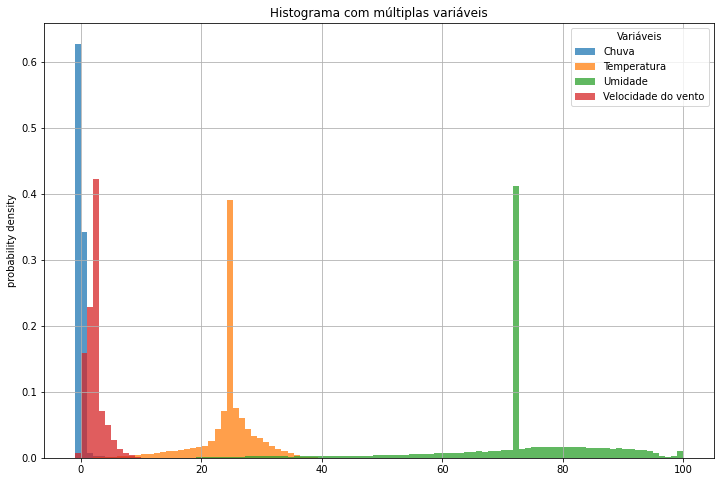

In [ ]:
# Plotando histograma com multiplas variáveis no mesmo eixo afim de visualizar a frequência dos dados => Chuva, Temperatura, Umidade e Velocidade do vento 
dfPlt = df[['CHUVA', 'TEM_INS', 'UMD_INS', 'VEN_VEL']]

dfPlt.plot.hist(bins = 100, density = True, figsize = (12, 8), alpha = 0.75, grid = True)

plt.title('Histograma com múltiplas variáveis')
plt.ylabel('probability density')
plt.legend(['Chuva', 'Temperatura', 'Umidade', 'Velocidade do vento'], title = 'Variáveis')

plt.show()

O histograma indica a frequência com que uma variável assume um determinado valor ou faixa de valores.

Atribuindo o argumento 'density = True' no dfPlt.plot.hist

Podemos observar a probabilidade de ocorrência de determinado fenômeno e alguma possível correlação entre as variáveis.

As variáveis escolhidas para plotagem do histograma foram:

- Chuva;
- Temperatura;
- Umidade;
- Velocidade do vento.

É possível verificar a variação da frequência de distribuição utilizando este conjunto do dados e como exemplo- definir um modelo para previsão do tempo.


# **Atividade 2**

In [ ]:
# Importando bibliotecas necessárias
import xarray as xr

In [ ]:
# Extraindo o cn .zip
with uzp('/content/drive/MyDrive/Classroom/Hacatom IA Hacatom/Jonas Morais - nc.zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Dataset/nc')

In [ ]:
# Atribuindo o dataset a ds
ds = xr.open_dataset('/content/drive/MyDrive/Dataset/nc/file.nc')
ds

<xarray.Dataset>
Dimensions:                (initial_time0_hours: 1, lat_0: 153, lon_0: 161, lv_AMSL1: 3, lv_DBLL13: 4, lv_HTGL2: 3, lv_HTGL4: 2, lv_HTGL8: 7, lv_ISBL0: 34, lv_ISBL10: 29, lv_ISBL12: 24, lv_ISBL5: 31, lv_ISBL7: 22, lv_ISBL9: 21, lv_PVL3: 2, lv_SIGL6: 4, lv_SPDL11: 2)
Coordinates: (12/14)
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2020-05-16T18...
  * lat_0                  (lat_0) float32 5.0 4.75 4.5 ... -32.5 -32.75 -33.0
  * lon_0                  (lon_0) float32 286.0 286.2 286.5 ... 325.8 326.0
  * lv_AMSL1               (lv_AMSL1) float32 1.829e+03 2.743e+03 3.658e+03
  * lv_HTGL2               (lv_HTGL2) float32 2.0 80.0 100.0
  * lv_HTGL4               (lv_HTGL4) float32 2.0 80.0
    ...                     ...
  * lv_ISBL10              (lv_ISBL10) float32 40.0 1e+03 ... 9.75e+04 1e+05
  * lv_ISBL12              (lv_ISBL12) float32 40.0 100.0 ... 8.5e+04 1e+05
  * lv_ISBL5               (lv_ISBL5) float32 100.0 200.0 ... 9.75e+04 1e+05
  * lv_ISBL7               (lv_ISBL7) float32 5e+03 1e+04 ... 9.75e+04 1e+05
  * lv_ISBL9               (lv_ISBL9) float32 1e+04 1.5e+04 ... 9.75e+04 1e+05
  * lv_PVL3                (lv_PVL3) float32 -2e-06 2e-06
Dimensions without coordinates: lv_DBLL13, lv_SIGL6, lv_SPDL11
Data variables: (12/119)
    4LFTX_P0_L1_GLL0       (initial_time0_hours, lat_0, lon_0) float32 ...
    5WAVH_P0_L100_GLL0     (initial_time0_hours, lat_0, lon_0) float32 ...
    ABSV_P0_L100_GLL0      (initial_time0_hours, lv_ISBL10, lat_0, lon_0) float32 ...
    APTMP_P0_L103_GLL0     (initial_time0_hours, lat_0, lon_0) float32 ...
    CAPE_P0_2L108_GLL0     (initial_time0_hours, lv_SPDL11, lat_0, lon_0) float32 ...
    CAPE_P0_L1_GLL0        (initial_time0_hours, lat_0, lon_0) float32 ...
    ...                     ...
    lv_DBLL13_l0           (lv_DBLL13) float32 ...
    lv_DBLL13_l1           (lv_DBLL13) float32 ...
    lv_SIGL6_l0            (lv_SIGL6) float32 ...
    lv_SIGL6_l1            (lv_SIGL6) float32 ...
    lv_SPDL11_l0           (lv_SPDL11) float32 ...
    lv_SPDL11_l1           (lv_SPDL11) float32 ...
Attributes:
    creation_date:  Fri Mar 19 09:34:16 MDT 2021
    NCL_Version:    6.6.2
    system:         Linux casper33 3.10.0-1127.18.2.el7.x86_64 #1 SMP Sun Jul...
    Conventions:    None
    grib_source:    gfs.0p25.2020051618.f000.grib2.teixeira478411.grb2
    title:          NCL: convert-GRIB-to-netCDF
    history:        Fri Mar 19 09:34:34 2021: ncks -O -d lat_0,-33.0,5.0 -d l...
    NCO:            netCDF Operators version 4.9.5 (Homepage = http://nco.sf....

In [ ]:
# Convertendo as longitudes de 0 a 360 para -180 a 180
ds.coords['lon_0'] = ((ds.coords['lon_0'] + 180) % 360) - 180
ds = ds.sortby(ds.lon_0)
ds

<xarray.Dataset>
Dimensions:                (initial_time0_hours: 1, lat_0: 153, lon_0: 161, lv_AMSL1: 3, lv_DBLL13: 4, lv_HTGL2: 3, lv_HTGL4: 2, lv_HTGL8: 7, lv_ISBL0: 34, lv_ISBL10: 29, lv_ISBL12: 24, lv_ISBL5: 31, lv_ISBL7: 22, lv_ISBL9: 21, lv_PVL3: 2, lv_SIGL6: 4, lv_SPDL11: 2)
Coordinates: (12/14)
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2020-05-16T18...
  * lat_0                  (lat_0) float32 5.0 4.75 4.5 ... -32.5 -32.75 -33.0
  * lon_0                  (lon_0) float32 -74.0 -73.75 -73.5 ... -34.25 -34.0
  * lv_AMSL1               (lv_AMSL1) float32 1.829e+03 2.743e+03 3.658e+03
  * lv_HTGL2               (lv_HTGL2) float32 2.0 80.0 100.0
  * lv_HTGL4               (lv_HTGL4) float32 2.0 80.0
    ...                     ...
  * lv_ISBL10              (lv_ISBL10) float32 40.0 1e+03 ... 9.75e+04 1e+05
  * lv_ISBL12              (lv_ISBL12) float32 40.0 100.0 ... 8.5e+04 1e+05
  * lv_ISBL5               (lv_ISBL5) float32 100.0 200.0 ... 9.75e+04 1e+05
  * lv_ISBL7               (lv_ISBL7) float32 5e+03 1e+04 ... 9.75e+04 1e+05
  * lv_ISBL9               (lv_ISBL9) float32 1e+04 1.5e+04 ... 9.75e+04 1e+05
  * lv_PVL3                (lv_PVL3) float32 -2e-06 2e-06
Dimensions without coordinates: lv_DBLL13, lv_SIGL6, lv_SPDL11
Data variables: (12/119)
    4LFTX_P0_L1_GLL0       (initial_time0_hours, lat_0, lon_0) float32 0.2934...
    5WAVH_P0_L100_GLL0     (initial_time0_hours, lat_0, lon_0) float32 5.925e...
    ABSV_P0_L100_GLL0      (initial_time0_hours, lv_ISBL10, lat_0, lon_0) float32 ...
    APTMP_P0_L103_GLL0     (initial_time0_hours, lat_0, lon_0) float32 289.2 ...
    CAPE_P0_2L108_GLL0     (initial_time0_hours, lv_SPDL11, lat_0, lon_0) float32 ...
    CAPE_P0_L1_GLL0        (initial_time0_hours, lat_0, lon_0) float32 235.0 ...
    ...                     ...
    lv_DBLL13_l0           (lv_DBLL13) float32 0.0 0.1 0.4 1.0
    lv_DBLL13_l1           (lv_DBLL13) float32 0.1 0.4 1.0 2.0
    lv_SIGL6_l0            (lv_SIGL6) float32 0.33 0.44 0.44 0.72
    lv_SIGL6_l1            (lv_SIGL6) float32 1.0 0.72 1.0 0.94
    lv_SPDL11_l0           (lv_SPDL11) float32 1.8e+04 2.55e+04
    lv_SPDL11_l1           (lv_SPDL11) float32 0.0 0.0
Attributes:
    creation_date:  Fri Mar 19 09:34:16 MDT 2021
    NCL_Version:    6.6.2
    system:         Linux casper33 3.10.0-1127.18.2.el7.x86_64 #1 SMP Sun Jul...
    Conventions:    None
    grib_source:    gfs.0p25.2020051618.f000.grib2.teixeira478411.grb2
    title:          NCL: convert-GRIB-to-netCDF
    history:        Fri Mar 19 09:34:34 2021: ncks -O -d lat_0,-33.0,5.0 -d l...
    NCO:            netCDF Operators version 4.9.5 (Homepage = http://nco.sf....

In [ ]:
# Extraindo um subset (área) apenas da américa do sul
ds_subset = ds.sel(lon_0 = slice(-90, -20), lat_0 = slice(10, -60))
ds_subset

<xarray.Dataset>
Dimensions:                (initial_time0_hours: 1, lat_0: 153, lon_0: 161, lv_AMSL1: 3, lv_DBLL13: 4, lv_HTGL2: 3, lv_HTGL4: 2, lv_HTGL8: 7, lv_ISBL0: 34, lv_ISBL10: 29, lv_ISBL12: 24, lv_ISBL5: 31, lv_ISBL7: 22, lv_ISBL9: 21, lv_PVL3: 2, lv_SIGL6: 4, lv_SPDL11: 2)
Coordinates: (12/14)
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2020-05-16T18...
  * lat_0                  (lat_0) float32 5.0 4.75 4.5 ... -32.5 -32.75 -33.0
  * lon_0                  (lon_0) float32 -74.0 -73.75 -73.5 ... -34.25 -34.0
  * lv_AMSL1               (lv_AMSL1) float32 1.829e+03 2.743e+03 3.658e+03
  * lv_HTGL2               (lv_HTGL2) float32 2.0 80.0 100.0
  * lv_HTGL4               (lv_HTGL4) float32 2.0 80.0
    ...                     ...
  * lv_ISBL10              (lv_ISBL10) float32 40.0 1e+03 ... 9.75e+04 1e+05
  * lv_ISBL12              (lv_ISBL12) float32 40.0 100.0 ... 8.5e+04 1e+05
  * lv_ISBL5               (lv_ISBL5) float32 100.0 200.0 ... 9.75e+04 1e+05
  * lv_ISBL7               (lv_ISBL7) float32 5e+03 1e+04 ... 9.75e+04 1e+05
  * lv_ISBL9               (lv_ISBL9) float32 1e+04 1.5e+04 ... 9.75e+04 1e+05
  * lv_PVL3                (lv_PVL3) float32 -2e-06 2e-06
Dimensions without coordinates: lv_DBLL13, lv_SIGL6, lv_SPDL11
Data variables: (12/119)
    4LFTX_P0_L1_GLL0       (initial_time0_hours, lat_0, lon_0) float32 0.2934...
    5WAVH_P0_L100_GLL0     (initial_time0_hours, lat_0, lon_0) float32 5.925e...
    ABSV_P0_L100_GLL0      (initial_time0_hours, lv_ISBL10, lat_0, lon_0) float32 ...
    APTMP_P0_L103_GLL0     (initial_time0_hours, lat_0, lon_0) float32 289.2 ...
    CAPE_P0_2L108_GLL0     (initial_time0_hours, lv_SPDL11, lat_0, lon_0) float32 ...
    CAPE_P0_L1_GLL0        (initial_time0_hours, lat_0, lon_0) float32 235.0 ...
    ...                     ...
    lv_DBLL13_l0           (lv_DBLL13) float32 0.0 0.1 0.4 1.0
    lv_DBLL13_l1           (lv_DBLL13) float32 0.1 0.4 1.0 2.0
    lv_SIGL6_l0            (lv_SIGL6) float32 0.33 0.44 0.44 0.72
    lv_SIGL6_l1            (lv_SIGL6) float32 1.0 0.72 1.0 0.94
    lv_SPDL11_l0           (lv_SPDL11) float32 1.8e+04 2.55e+04
    lv_SPDL11_l1           (lv_SPDL11) float32 0.0 0.0
Attributes:
    creation_date:  Fri Mar 19 09:34:16 MDT 2021
    NCL_Version:    6.6.2
    system:         Linux casper33 3.10.0-1127.18.2.el7.x86_64 #1 SMP Sun Jul...
    Conventions:    None
    grib_source:    gfs.0p25.2020051618.f000.grib2.teixeira478411.grb2
    title:          NCL: convert-GRIB-to-netCDF
    history:        Fri Mar 19 09:34:34 2021: ncks -O -d lat_0,-33.0,5.0 -d l...
    NCO:            netCDF Operators version 4.9.5 (Homepage = http://nco.sf....

In [ ]:
# Salvando o subset como um novo arquivo NetCDF
ds_subset.to_netcdf('/content/drive/MyDrive/Dataset/nc/ds_NC.nc')

In [ ]:
# Extraindo os dados da variável 'TMP_P0_2L108_GLL0'
u = ds['UGRD_P0_2L108_GLL0']
v = ds['VGRD_P0_2L108_GLL0']
t = ds_subset['TMP_P0_2L108_GLL0'] - 273.15

# Calculando velocidade do vento
wspd = (u**2 + v**2)**(0.5)

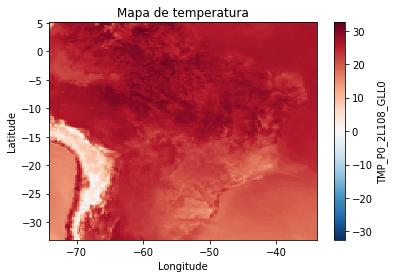

In [ ]:
# Plotando mapa de temperatura com a média das temperaturas em TMP_P0_2L108_GLL0
t.sel().mean(dim='initial_time0_hours').plot()

plt.title('Mapa de temperatura')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Neste caso, estamos lindando com um formulário de dados comum da rede (NetCDF), normalmente utilizado para armazenar dados geográficos multidimensionais.

Como exemplo, temos a variável 'TMP_P0_2L108_GLL0' e com este conjuto de dados podemos plotar um mapa de temperatura visto a cima.